In [6]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


In [7]:
df = pd.read_csv('stats_pl.csv')

In [8]:
df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,1067.0,280.0,18017.0,NaN,2.0,NaN,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,867.0,208.0,19250.0,NaN,2.0,NaN,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,783.0,247.0,19377.0,NaN,4.0,NaN,2.0,79.0,30.0,2006-2007


## Calculando a média e a variância do Dataset

In [9]:
df.mean()

wins                       14.150000
losses                     14.150000
goals                      51.062500
total_yel_card             61.079167
total_red_card              2.862500
total_scoring_att         514.241667
ontarget_scoring_att      168.116667
hit_woodwork               12.283333
att_hd_goal                 9.016667
att_pen_goal                3.650000
att_freekick_goal           1.495833
att_ibox_goal              43.341667
att_obox_goal               7.741667
goal_fastbreak              2.983333
total_offside              86.291667
clean_sheet                10.945833
goals_conceded             51.062500
saves                      51.736364
outfielder_block          132.133333
interception              555.179167
total_tackle              762.133333
last_man_tackle             5.900000
total_clearance          1252.416667
head_clearance            675.236364
own_goals                   1.966667
penalty_conceded            4.750000
pen_goals_conceded          3.650000
t

In [10]:
df.var()

wins                    3.627029e+01
losses                  3.132469e+01
goals                   2.625526e+02
total_yel_card          1.015711e+02
total_red_card          3.248797e+00
total_scoring_att       9.212000e+03
ontarget_scoring_att    1.501476e+03
hit_woodwork            2.324156e+01
att_hd_goal             1.338884e+01
att_pen_goal            4.211715e+00
att_freekick_goal       1.782409e+00
att_ibox_goal           2.051966e+02
att_obox_goal           1.338905e+01
goal_fastbreak          5.849093e+00
total_offside           4.299899e+02
clean_sheet             1.722300e+01
goals_conceded          1.744940e+02
saves                   3.181674e+03
outfielder_block        1.020275e+03
interception            1.998350e+04
total_tackle            1.096297e+04
last_man_tackle         2.955481e+01
total_clearance         1.070817e+05
head_clearance          3.347567e+04
own_goals               2.166248e+00
penalty_conceded        5.117155e+00
pen_goals_conceded      3.726360e+00
t

## Calculando as médidas de dispersão de algumas colunas

In [24]:
df["head_clearance"].describe()

count     220.000000
mean      675.236364
std       182.963575
min       308.000000
25%       537.000000
50%       635.000000
75%       801.250000
max      1183.000000
Name: head_clearance, dtype: float64

In [35]:
df['corner_taken'].mean()

207.19166666666666

In [36]:
df['corner_taken'].median()

201.0

In [38]:
df['corner_taken'].mode()

0    181.0
dtype: float64

In [37]:
df['corner_taken'].std()

35.93317736722323

In [14]:
df['own_goals'].mean()

23908.9625

In [49]:
df['own_goals'].median()

2.0

In [50]:
df['own_goals'].mode()

0    2.0
dtype: float64

In [51]:
df['own_goals'].std()

1.471818010701332

In [29]:
df['last_man_tackle'].mean()

5.9

In [32]:
df['last_man_tackle'].median()

4.0

In [40]:
df['last_man_tackle'].mode()

0    4.0
dtype: float64

In [33]:
df['last_man_tackle'].std()

5.436433731361137

## Plotando os Boxplot de alguma colunas

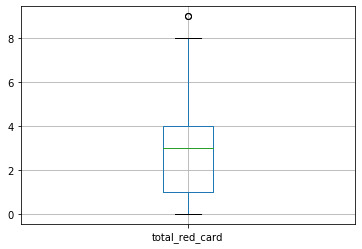

In [21]:

df.boxplot(column='total_red_card')



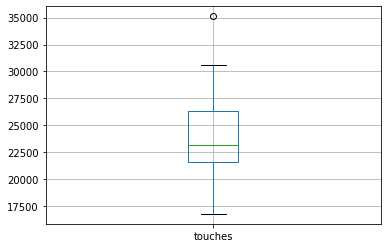

In [26]:
df.boxplot(column='touches')

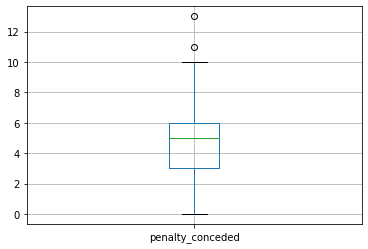

In [22]:
df.boxplot(column='penalty_conceded')

In [47]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm') # mapa de correlação